In [2]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

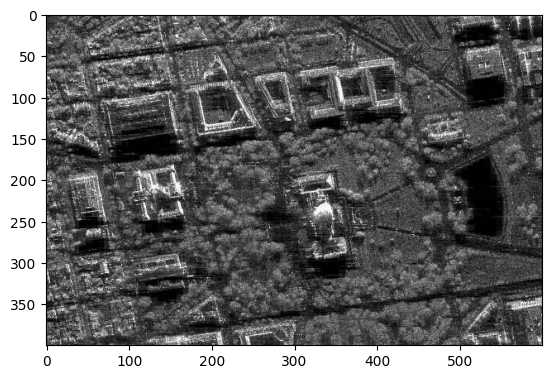

In [13]:
img_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray');

### 2. Постройте гистограмму

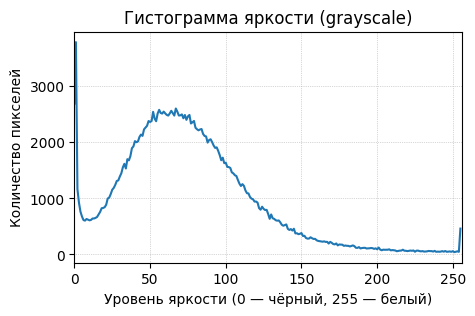

In [17]:
# гистограмма яркости изображения
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title('Гистограмма яркости (grayscale)')
plt.xlabel('Уровень яркости (0 — чёрный, 255 — белый)')
plt.ylabel('Количество пикселей')
plt.xlim([0, 256])
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

### 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

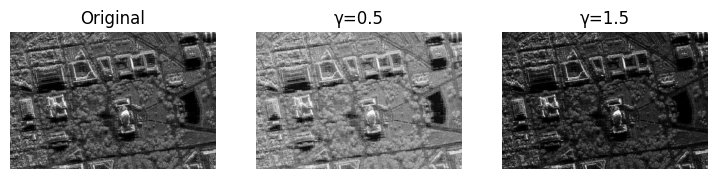

In [20]:
def gamma_correction(img, gamma):
    img = img.astype(np.float32)/255.0
    img = np.power(img, gamma)
    return (img*255).astype(np.uint8)

gamma_lt = gamma_correction(img_gray, 0.5)
gamma_gt = gamma_correction(img_gray, 1.5)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Original'); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(gamma_lt, cmap='gray'); plt.title('γ=0.5'); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(gamma_gt, cmap='gray'); plt.title('γ=1.5'); plt.axis('off')
plt.show()

### 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

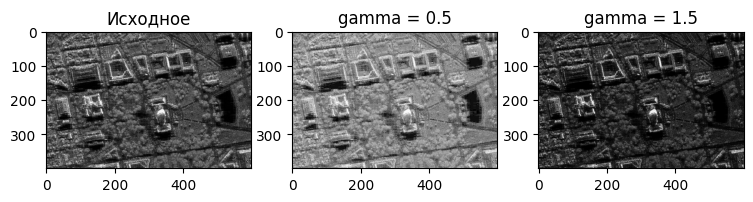

Gamma = 0.5 → MSE: 3250.4291, SSIM: 0.7875
Gamma = 1.5 → MSE: 971.8207, SSIM: 0.8066


In [29]:
def gamma_correction(img, gamma):
    img = img.astype(np.float32) / 255.0
    img = np.power(img, gamma)
    return (img * 255).astype(np.uint8)

gamma_lt = gamma_correction(img_gray, 0.5)
gamma_gt = gamma_correction(img_gray, 1.5)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Исходное');
plt.subplot(1,3,2); plt.imshow(gamma_lt, cmap='gray'); plt.title('gamma = 0.5');
plt.subplot(1,3,3); plt.imshow(gamma_gt, cmap='gray'); plt.title('gamma = 1.5');
plt.show()

from skimage.metrics import structural_similarity, mean_squared_error

mse_lt = mean_squared_error(img_gray, gamma_lt)
mse_gt = mean_squared_error(img_gray, gamma_gt)
ssim_lt = structural_similarity(img_gray, gamma_lt, data_range=255)
ssim_gt = structural_similarity(img_gray, gamma_gt, data_range=255)

print(f"Gamma = 0.5 → MSE: {mse_lt:.4f}, SSIM: {ssim_lt:.4f}")
print(f"Gamma = 1.5 → MSE: {mse_gt:.4f}, SSIM: {ssim_gt:.4f}")

### 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

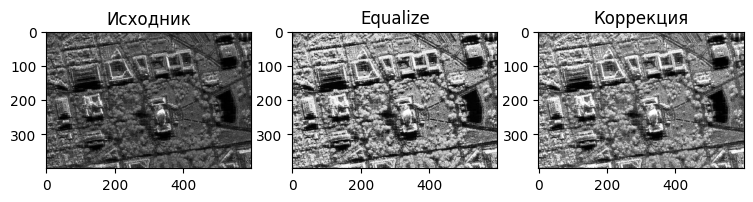

In [31]:
eq = cv2.equalizeHist(img_gray)
src = img_gray.astype(np.float32); ref = eq.astype(np.float32)
corr = (src - src.mean()) * (ref.std()/(src.std()+1e-6)) + ref.mean()
corr = np.clip(corr, 0, 255).astype(np.uint8)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(img_gray, cmap='gray'); plt.title('Исходник');
plt.subplot(1,3,2); plt.imshow(eq, cmap='gray'); plt.title('Equalize');
plt.subplot(1,3,3); plt.imshow(corr, cmap='gray'); plt.title('Коррекция');
plt.show()

### 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

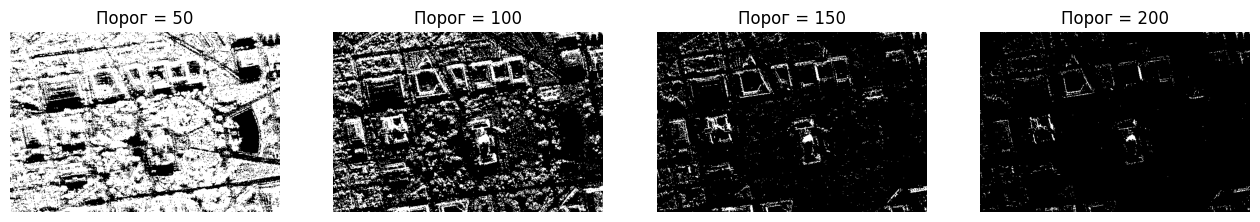

In [34]:
thresh_values = [50, 100, 150, 200]
fig, axs = plt.subplots(1, len(thresh_values), figsize=(16,4))
for i, t in enumerate(thresh_values):
    _, thresh_img = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
    axs[i].imshow(thresh_img, cmap='gray')
    axs[i].set_title(f'Порог = {t}')
    axs[i].axis('off')